# Notebook 45: Stress distributions and faulting

In 1951, W. Hafner published a very interesting [paper](<https://doi.org/10.1130/0016-7606(1951)62[373:SDAF]2.0.CO;2>) on how crustal stress distributions lead to faulting. The method he employs is based on elasticity and the use of the Airy stress function ($\Phi$), which for a homogeneous body and in two-dimensions ($x$: horizontal, $y$: depth) allows for the calculation of the three components of the stress tensor:

$$\sigma_x=\frac{\partial^2 \Phi}{\partial y^2} ; \quad \sigma_y=\frac{\partial^2 \Phi}{\partial x^2} ; \quad \tau_{x y}=-\frac{\partial^2 \Phi}{\partial x \partial y} \qquad (1)$$

For a stress system to be valid, this function must satisfy the compatibility equation:

$$\frac{\partial^4 \Phi}{\partial x^4}+2 \frac{\partial^4 \Phi}{\partial x^2 \partial y^2}+\frac{\partial^4 \Phi}{\partial y^4}=0\qquad (2)$$

The maximum shearing stress at any point in the elastic medium is:

$$\tau_{\max }= \pm\left\{\left(\frac{\sigma_x-\sigma_y}{2}\right)^2 \tau_{x y}\right\}^{\frac{1}{2}}\qquad (3)$$

The intensities of the two principal stresses are:

$$\sigma_{max} \text { or } \sigma_{min}=\frac{1}{2}\left(\sigma_x+\sigma_y\right) \pm \tau_{\max }\qquad(4)$$

Note that in [Hafner(1951)](<https://doi.org/10.1130/0016-7606(1951)62[373:SDAF]2.0.CO;2>), stress components are taken positive if they represent tensile stresses. Therefore $\sigma_{min}$ is the maximum compressive stress.

Hafner determines the attitude of associated fault surfaces by drawing curves at a constant angle $\theta$ —usually 30°— to the direction of $\sigma_{min}$. In addition, he uses the following criterion to delimit stable areas not experiencing deformation:

$$\sigma_{\min } \leqq n \sigma_{\max }+\sigma_0\qquad(5)$$

where $\sigma_{min}$ is the maximum compressive stress, $\sigma_{max}$ is the minimum compressive stress, $\sigma_0$ is the unconfined compressive strength, and $n$ is a material constant representing the increase of strength with confining pressure.

Thus, by treating the crust as a homogeneous elastic medium and focusing on two-dimensional plane deformations, this approach links tectonic forces and deformations. Furthermore, it incorporates the effect of gravity through a "standard state" of hydrostatic pressure ($\sigma_x=\sigma_y=-\rho gy$, $\tau_{xy}=0$), allowing for the superimposition of supplementary tectonic stresses.

## Python function

The function [hafner](../functions/hafner.py) draws the principal stress trajectories (upper graph), and fault trajectories (lower graph), for the simplest case in [Hafner(1951)](<https://doi.org/10.1130/0016-7606(1951)62[373:SDAF]2.0.CO;2>), namely a superimposed horizontal pressure with constant lateral and vertical gradient. For this case, the stress components are given by:

$$\begin{aligned}
& \sigma_x=c x-(b+a) y \\
& \sigma_x=-a y \\
& \tau_{x y}=-c y
\end{aligned}\qquad(6)$$

where $a$, $b$ and $c$ are constants. $a$ is the vertical gradient due to weight ($\rho g$), and $b$ and $c$ are the vertical and horizontal gradients of the superimposed horizontal pressure, respectively. 

## Application

Let's look first at the stress distributions and faulting produced by a superimposed horizontal pressure constant with depth ($b=0$) and with constant lateral gradient ($c>0$). In the code below, we use the values in [Hafner(1951)](<https://doi.org/10.1130/0016-7606(1951)62[373:SDAF]2.0.CO;2>), including $c=a$.

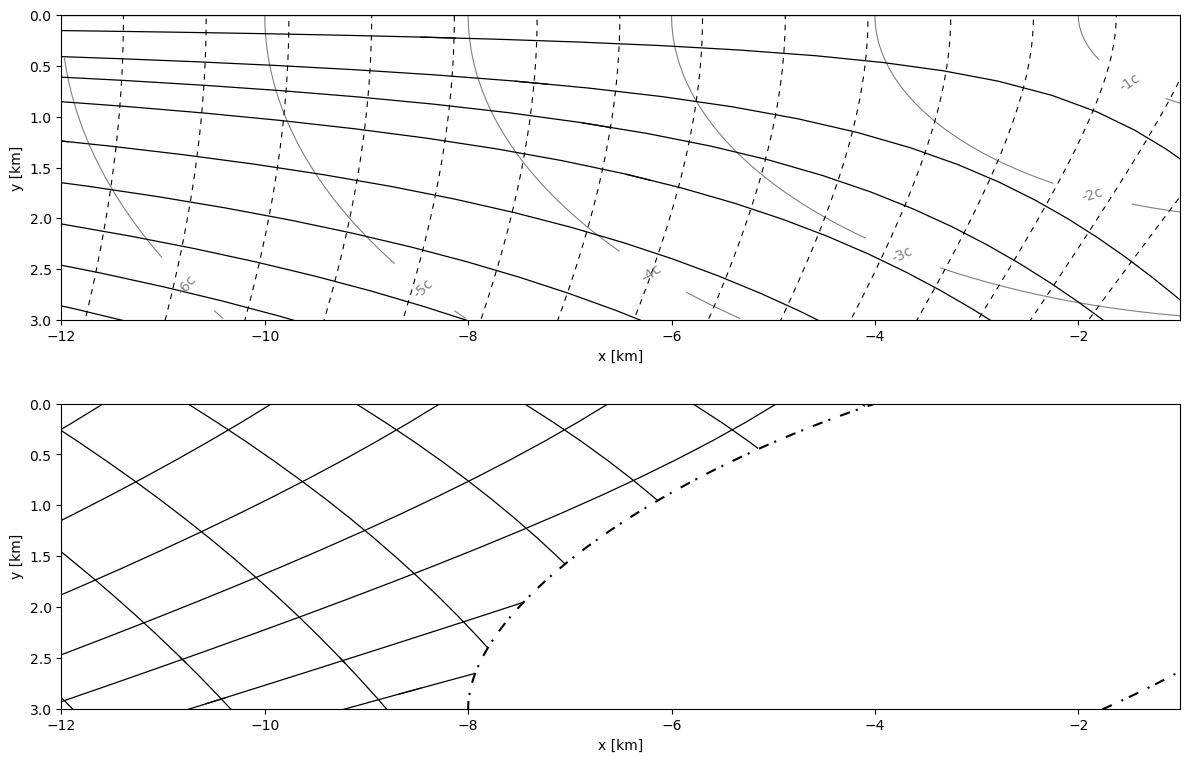

In [1]:
import numpy as np

# this makes visible our functions folder
import sys, os
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import functions 
from hafner import hafner

# a = rho * g (vertical gradient due to weight) 
a = 24.5 # MPa/km 
# b = vertical gradient of superimposed horizontal pressure 
b = 0 # MPa/km, no vertical gradient in this case
# c = lateral gradient of superimposed horizontal pressure 
c = a # MPa/km 
# theta = angle between fault plane and maximum compressive stress 
theta = np.radians(32) # radians
# sigma_0 = unconfined compressive strength of the rock 
sigma_0 = -98 # MPa, negative for compressive stress
# n = coefficient for the increase of strength with sigma_max 
n = 4.0 
# Length and Depth of the block in km 
L, D = 12, 3
# Number of points in each direction
grid_x, grid_y = 200, 100

# Plot stress distribution (Figure 6 of Hafner, 1951)
fig, ax = hafner(a, b, c, theta, sigma_0, n, L, D, grid_x, grid_y)

This is essentially Figure 6 of [Hafner(1951)](<https://doi.org/10.1130/0016-7606(1951)62[373:SDAF]2.0.CO;2>). The upper graph shows the principal stress trajectories ($\sigma_{min}$: black solid lines, $\sigma_{max}$: black dashed lines), and contours of the maximum shearing stress ($\tau_{max}$) as multiples of $c$ (grey lines). The trajectories of $\sigma_{min}$ are curved lines, dipping downward away from the area of maximum compression on the left side ($x=-12$ km). $\tau_{max}$ naturally increases towards the area of greater horizontal compression but it also increases with depth.

The lower graph shows the fault trajectories (black lines) and the limit of fault stability (dashed-dotted line). The white area is stable and does not experience any faulting. Since the principal stress trajectories are curved, so are the potential fault surfaces, which because of the superimposed horizontal pressure are thrusts. The thrusts dipping towards the area of maximum compression are slightly concave upwards, while the complementary thrusts (backthrusts) are concave downwards. 

Now let's look at the case of a superimposed horizontal pressure with constant vertical and lateral gradients ($b$ and $c>0$). For this case, we make $b=c$.

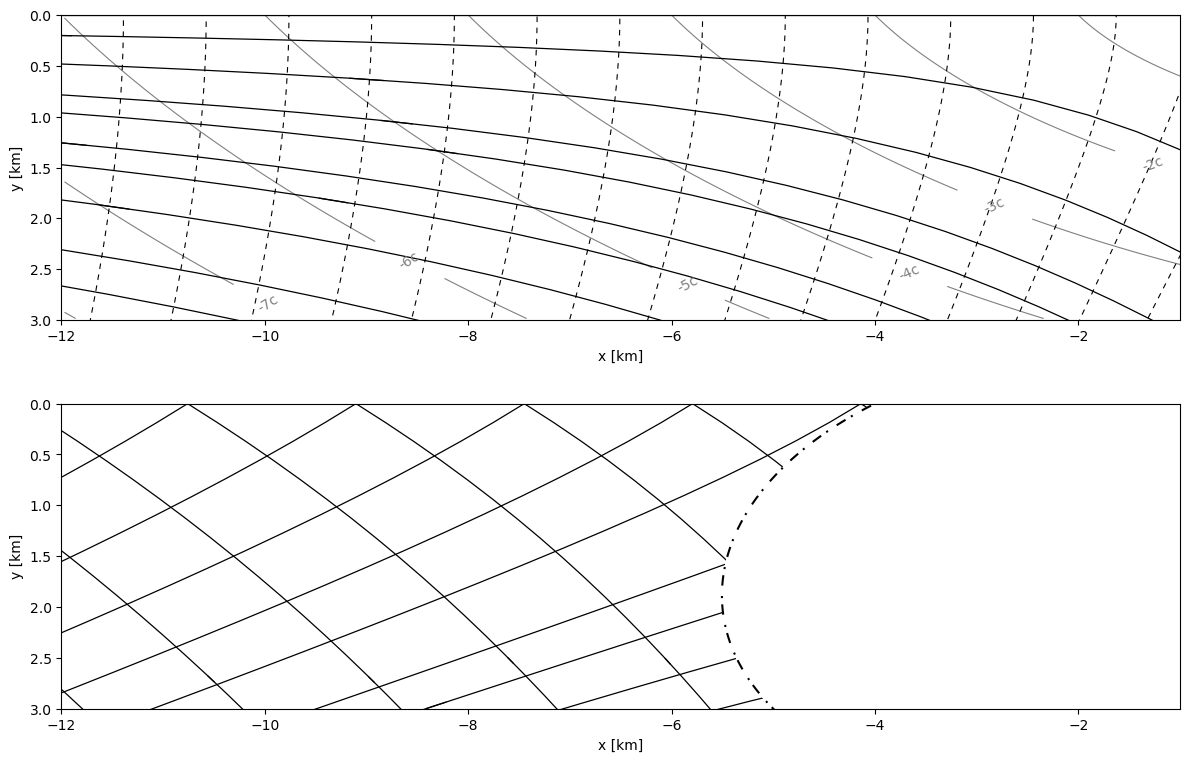

In [2]:
# b = vertical gradient of superimposed horizontal pressure 
b = c # MPa/km, now with vertical gradient equal to lateral gradient

# Plot stress distribution (Figure 7 of Hafner, 1951)
fig, ax = hafner(a, b, c, theta, sigma_0, n, L, D, grid_x, grid_y)

This is essentially Figure 7 of [Hafner(1951)](<https://doi.org/10.1130/0016-7606(1951)62[373:SDAF]2.0.CO;2>). The addition of a vertical gradient $b$ for the superimposed horizontal pressure, results in less curved, somewhat gentler $\sigma_{min}$ trajectories (solid lines in upper graph), a higher increase of $\tau_{max}$ with depth (grey lines in upper graph), and gentler thrusts (solid lines in lower graph). Faulting occurs over a larger area and the limit of fault stability is steeper (dashed-dotted line in lower graph).

## Further exercises:

- Use $c=a/2$. What is the effect of this lower lateral gradient on fault stability?

- Use $\sigma_0=50$ MPa. What is the effect of lower crustal strength on fault stability?

- For the first case of superimposed horizontal stress constant with depth, apply tension instead of pressure. This should generate normal faults. 